In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


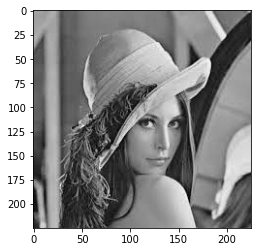

In [43]:
def load_image(image_path):
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return grey_image

input_image = load_image('/content/lena.jpg')
plt.imshow(input_image,"gray")

In [39]:
def convolve2d(image, kernel):

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)

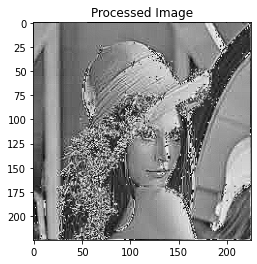

In [36]:
plt.imshow(image_sharpen, "gray")
plt.title("output Image")
plt.show()